# Newton’s Laws of Motion  

Newton’s second law describes how the motion of an object changes under the influence of forces.  
It states that the acceleration of a body is directly proportional to the net force acting on it:

$
m \frac{d^2 r(t)}{dt^2} = F(t),
$

where:  
- $m$: mass of the object  
- $r(t)$: position as a function of time  
- $F(t)$: total force applied  

In many cases, the force comes from a potential energy function $U(r)$:  

$
F = - \nabla U(r).
$

If the force is known, one can predict the trajectory $r(t)$ by solving this equation.  
For simple systems (constant force, harmonic oscillator, drag, etc.), analytical solutions exist.  
For more complex problems, numerical methods are required.  

---

# Simulating Particle Dynamics  

Since Newton’s law is a **second-order ODE**, it is usually rewritten as two coupled first-order ODEs:  

$
\frac{dr(t)}{dt} = v(t),
$

$
m \frac{dv(t)}{dt} = F(t),
$

where $v(t)$ is the velocity.  

---

## Discretization with the Forward Euler Method  

To solve these equations numerically, we divide time into discrete steps of size $\Delta t$.  
The forward Euler scheme updates velocity and position at each step $n$ as follows:

- **Velocity update**  
$
v^{n+1} = v^n + \frac{F^n}{m} \Delta t
$

- **Position update**  
$
r^{n+1} = r^n + v^{n+1} \Delta t
$

with:  
- $t_{n+1} = t_n + \Delta t$  
- $r^n = r(t_n)$: position at step $n$  
- $v^n = v(t_n)$: velocity at step $n$  
 

In [32]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

pio.renderers.default = "vscode"   # for VS Code

# Parameters
T = 10.0   # s
m = 0.3    # kg
g = 9.8    # m/s^2
v0x = -0.1 # m/s
H = 553.0  # m

# Time discretization
dt = 0.05
N = int(T / dt)
time = np.linspace(0, T, N+1)

# Arrays for dynamics
v = np.zeros((N+1, 2))
r = np.zeros((N+1, 2))
f = np.zeros((N+1, 2))

# Initial conditions
r[0] = np.array([0., H])
v[0] = np.array([-v0x, 0.])

# Force (gravity only)
f[:] = np.array([0., -m*g])

# Time integration (Euler method)
for n in range(N):
    v[n+1] = v[n] + f[n]/m * dt
    r[n+1] = r[n] + v[n+1] * dt

# Create animation frames
frames = [
    go.Frame(
        data=[go.Scatter(x=[r[i,0]], y=[r[i,1]], mode="markers", marker=dict(size=15, color="green"))],
        name=str(i)
    )
    for i in range(N)
]

# Base figure
fig = go.Figure(
    data=[go.Scatter(x=[r[0,0]], y=[r[0,1]], mode="markers", marker=dict(size=15, color="green"))],
    layout=go.Layout(
        xaxis=dict(range=[-2, 2], title="Position (m)"),
        yaxis=dict(range=[0, 600], title="Height (m)"),
        title="Particle falling under gravity",
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(label="Play",
                     method="animate",
                     args=[None, {"frame": {"duration": dt*1000, "redraw": True},
                                  "fromcurrent": True}]),
                dict(label="Pause",
                     method="animate",
                     args=[[None], {"frame": {"duration": 0, "redraw": False},
                                    "mode": "immediate"}])
            ]
        )]
    ),
    frames=frames
)

fig.show()

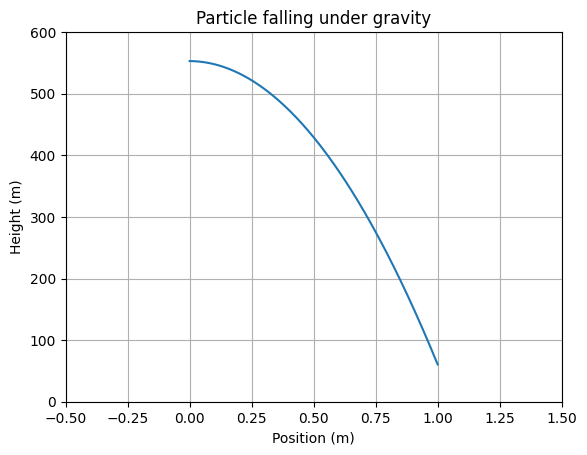

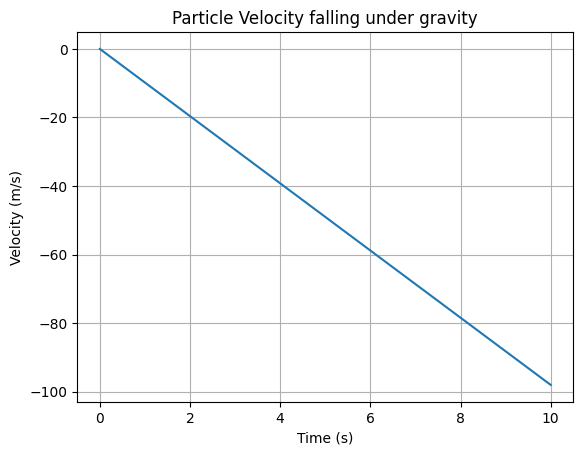

In [33]:

# Plotting the Position of the Particle using Matplotlib
figure = plt.figure()
plt.plot(r[:,0], r[:,1])
plt.xlim([-0.5, 1.5])
plt.ylim([0, 600])
plt.xlabel("Position (m)")
plt.ylabel("Height (m)")
plt.title("Particle falling under gravity")
plt.grid()
plt.show()

# Plotting the Position of the Particle using Matplotlib
figure = plt.figure()
plt.plot(np.linspace(0, N*dt, len(v[:,1])), v[:,1])
#plt.ylim([0, 600])
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Particle Velocity falling under gravity")
plt.grid()
plt.show()
